# Medical Costs Personal

<img src="https://storage.googleapis.com/kaggle-datasets-images/13720/18513/71003abbbd54cc65c64065c1de79a9ff/dataset-cover.jpg?t=2018-02-21-00-25-33g" width="auto">

Este notebook contém a análise exploratória de um dataset contendo informações de diversos pacientes (gênero, se é fumante, imc, etc) e seus gastos com saúde, com o objetivo de responder a perguntas de negócio feitas no material das aulas do Clube Universidade dos Dados.<br>
O dataset utilizado nessa análise pode ser encontrado <a href="https://www.kaggle.com/datasets/mirichoi0218/insurance">aqui</a>.<br>

### Sobre as variáveis:
<strong>age:</strong> Idade do beneficiário primário<br>
<strong>sex:</strong> Gênero do contratante do seguro, feminino(female), masculino(male)<br>
<strong>bmi:</strong> Índice de Massa Corporal (IMC), fornecendo uma compreensão do corpo, pesos que são relativamente altos ou baixos em relação à altura, é um índice objetivo do peso corporal (kg/m²) usando a relação entre altura e peso, idealmente entre 18,5 e 24,9.<br>
<strong>children:</strong> Número de filhos cobertos pelo seguro de saúde / número de dependentes<br>
<strong>smoker:</strong> É fumante<br>
<strong>region:</strong> Área residencial do beneficiário nos EUA, nordeste, sudeste, sudoeste, noroeste.<br>
<strong>charges:</strong> Custos médicos individuais cobrados pelo seguro de saúde.

<hr>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
insurance = pd.read_csv('datasets/insurance.csv')

<hr>

In [3]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
# verificando se há valores faltantes
insurance.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Não há valores faltantes no dataset.

In [6]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
print(f"O dataset possui {insurance.shape[0]} linhas e {insurance.shape[1]} colunas.")

O dataset possui 1338 linhas e 7 colunas.


In [8]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


O dataset possui 1338 observações não nulas, como o total de observações é de 1338, não há valores faltantes.<br>
A média de idade é de aproximadamente 39 anos, com um desvio padrão de 14, o que indica uma dispersão considerável dos valores da variável idade.<br>
25% das pessoas presentes no dataset possuem menos de 27 anos (Q1 = 27), 50% entre 27 e 39 anos (Q2=39) e, como o valor de idade médio é de 39.21, logo, próximo da mediana, os dados da variável idade não aparentam ter uma assimetria acentuada.
75% das pessoas presentes no dataset possuem menos de 51 anos (Q3 = 51) e a pessoa mais velha do dataset possui 64 anos.

<hr>

Perguntas de negócio (sugeridas na atividade da aula):
- Qual a mediana da coluna BMI? E a média? Qual desses valores é maior e o que isso significa?
- Qual a proporção de fumantes no dataset? E de não fumantes?
- Existe alguma diferença na cobrança para fumantes e não fumantes? Se sim, ao que você imagina que isso se deve?
- Qual a média de BMI para fumantes? Ela é muito diferente da observada para não fumantes? Se sim, por qual motivo você acha que isso ocorre?
- Existe alguma diferença de cobrança para quem tem filhos?
- Se uma homem é fumante e ainda tem um BMI acima do considerado normal, é possível que isso seja um indicador negativo para a seguradora. Quantos homens estão nessa situação?

<hr>

### Qual a mediana da coluna BMI? E a média? Qual desses valores é maior e o que isso significa?

In [9]:
print(f'A mediana da coluna BMI é de {insurance.bmi.median():.2f}, enquanto que a média da mesma coluna é de {insurance.bmi.mean():.2f}')

A mediana da coluna BMI é de 30.40, enquanto que a média da mesma coluna é de 30.66


A mediana é menor do que a média, o que indica que se plotarmos um gráfico com a distribuição dos dados, haverá alguns valores relativamente altos, na parte direita da distribuição, que estão puxando a média para cima. No entanto, a diferença é pequena, o que sugere que a distribuição dos dados pode não ser muito assimétrica.
<br>
Quando a assimetria é significativa, o que não parece ser o caso, ela pode afetar a interpretação dos dados, especialmente ao usar a média como medida de tendência central.

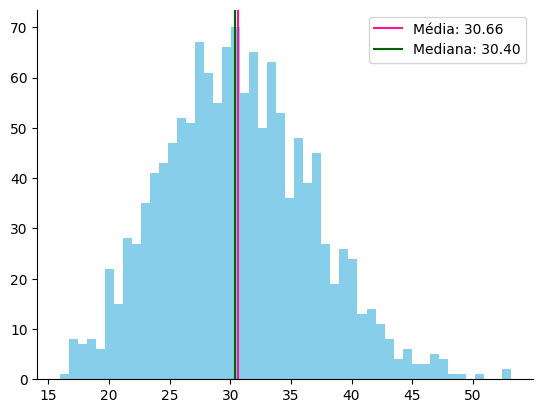

In [10]:
# plotando um histograma para a variável bmi para verificar a média e a mediana
plt.hist(data=insurance, x='bmi', bins=50, color='skyblue', alpha=1)
mean_bmi = insurance.bmi.mean()
median_bmi = insurance.bmi.median()

plt.axvline(mean_bmi, color='deeppink', linewidth=1.5, label=f'Média: {mean_bmi:.2f}')
plt.axvline(median_bmi, color='darkgreen', linewidth=1.5, label=f'Mediana: {median_bmi:.2f}')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend()
plt.show()

<hr>

### Qual a proporção de fumantes e não fumantes?

In [11]:
prop_smokers = insurance['smoker'].value_counts(normalize=True)
prop_smokers

smoker
no     0.795217
yes    0.204783
Name: proportion, dtype: float64

In [12]:
print(f'A proporção de fumantes é de {prop_smokers.get("yes",0):.2%} e a de não fumantes é de {prop_smokers.get("no",0):.2%}.')

A proporção de fumantes é de 20.48% e a de não fumantes é de 79.52%.


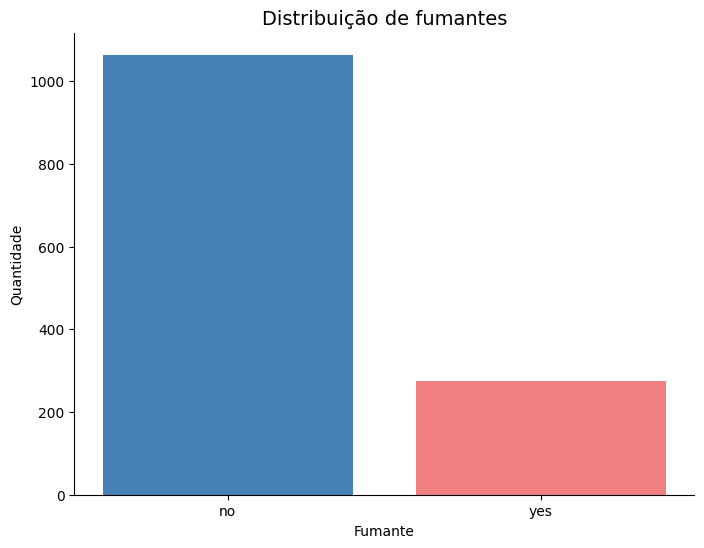

In [13]:
# plotando um gráfico para visualizar a diferença
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(insurance['smoker'].value_counts().index, insurance['smoker'].value_counts().values,
       color = ['steelblue', 'lightcoral'])
ax.set_xlabel('Fumante', fontsize = 10)
ax.set_ylabel('Quantidade', fontsize = 10)
ax.set_title('Distribuição de fumantes', fontsize=14)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

<hr>

### Existe alguma diferença na cobrança para fumantes e não fumantes? Se sim, ao que você imagina que isso se deve?

In [14]:
# estatísticas sobre os valores cobrados para fumantes
insurance[insurance['smoker'] == 'yes']['charges'].describe()

count      274.000000
mean     32050.231832
std      11541.547176
min      12829.455100
25%      20826.244213
50%      34456.348450
75%      41019.207275
max      63770.428010
Name: charges, dtype: float64

In [15]:
# estatísticas sobre os valores cobrados para não fumantes
insurance[insurance['smoker'] == 'no']['charges'].describe()

count     1064.000000
mean      8434.268298
std       5993.781819
min       1121.873900
25%       3986.438700
50%       7345.405300
75%      11362.887050
max      36910.608030
Name: charges, dtype: float64

In [34]:
# mediana dos valores cobrados para quem não é fumante
insurance[insurance['smoker'] == 'no']['charges'].median()

7345.4053

In [35]:
# mediana dos valores cobrados para quem é fumante
insurance[insurance['smoker'] == 'yes']['charges'].median()

34456.348450000005

In [33]:
(1-(insurance[insurance['smoker'] == 'no']['charges'].median()/insurance[insurance['smoker'] == 'yes']['charges'].median()))*100

78.68199727937218

Verifica-se que os valores cobrados para fumantes são bem maiores do que para não fumantes. Utilizando a mediana como referência, há uma cobrança 78,68% mais alta para quem é fumante, em comparação com não fumantes.<br>
Isso pode ocorrer devido ao risco maior de problemas de saúde para quem é fumante, o que implica em mais custos para o plano de saúde.

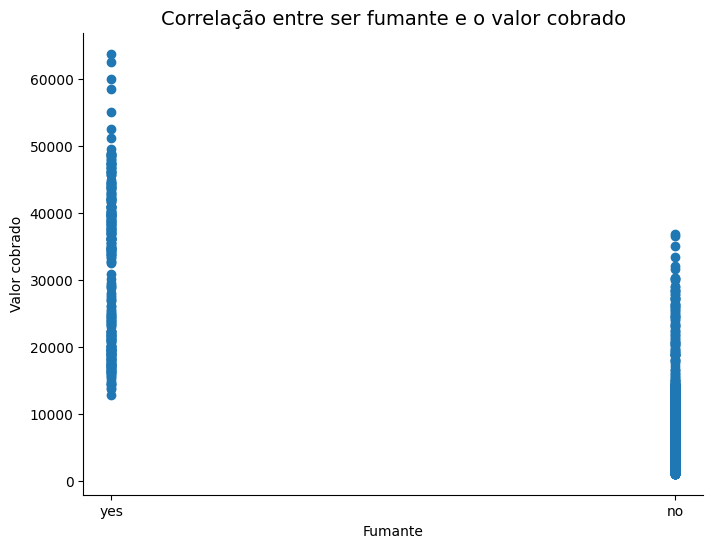

In [32]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(insurance['smoker'], insurance['charges'])

ax.set_xlabel('Fumante', fontsize = 10)
ax.set_ylabel('Valor cobrado', fontsize = 10)
ax.set_title('Correlação entre ser fumante e o valor cobrado', fontsize=14)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

<hr>

### Qual a média de BMI para fumantes? Ela é muito diferente da observada para não fumantes? Se sim, por qual motivo você acha que isso ocorre?

In [17]:
# Média de BMI para fumantes
insurance[insurance['smoker'] == 'yes']['bmi'].mean()

30.70844890510949

In [18]:
# Média de BMI para não fumantes
insurance[insurance['smoker'] == 'no']['bmi'].mean()

30.651795112781954

A média de BMI para fumantes e para não fumantes não é muito diferente, o que pode indicar que o BMI não é fortemente impactado por essa característica.

<hr>

### Existe alguma diferença de cobrança para quem tem filhos?

Identifique se ter filhos parece acarretar numa cobrança maior olhando a média de charges para quem tem 0 filhos e a média para quem tem 1 ou mais filhos. 

In [19]:
# média do valor cobrado para quem não tem filhos
no_children_charges_mean = insurance[insurance['children'] == 0]['charges'].mean()
no_children_charges_mean

12365.97560163589

In [20]:
# média do valor cobrado para quem tem filhos
have_children_charges_mean = insurance[insurance['children'] > 0]['charges'].mean()
have_children_charges_mean

13949.941093481675

In [21]:
print(f'A média do valor cobrado para quem não possui filhos é {(1-(no_children_charges_mean/have_children_charges_mean))*100:.2f}% menor em relação ao valor cobrado para quem possui um ou mais filhos')

A média do valor cobrado para quem não possui filhos é 11.35% menor em relação ao valor cobrado para quem possui um ou mais filhos


In [22]:
# média do valor cobrado para quem tem 1 filho
insurance[insurance['children'] == 1]['charges'].mean()

12731.171831635802

In [23]:
# média do valor cobrado para quem tem 2 filhos
insurance[insurance['children'] == 2]['charges'].mean()

15073.563733958332

In [24]:
# média do valor cobrado para quem tem 3 filhos
insurance[insurance['children'] == 3]['charges'].mean()

15355.318366815285

In [25]:
# média do valor cobrado para quem tem 4 filhos
insurance[insurance['children'] == 4]['charges'].mean()

13850.6563112

In [26]:
# média do valor cobrado para quem tem 5 filhos
five_children_charges_mean = insurance[insurance['children'] == 5]['charges'].mean()

No entanto, ao verificar a média do valor cobrado para quem possui 1, 2, 3, 4 ou 5 filhos, a média do valor cobrado aumenta conforme a quantidade de filhos para quem tem até 3 filhos. A partir desse ponto, ela diminui para quem tem 4 ou 5 filhos, sendo a média do valor cobrado para quem tem 5 filhos menor do que a média do valor cobrado para quem não possui filhos. Lembrando que, essa variável representa o número de filhos dividido pelo número de dependentes do seguro.

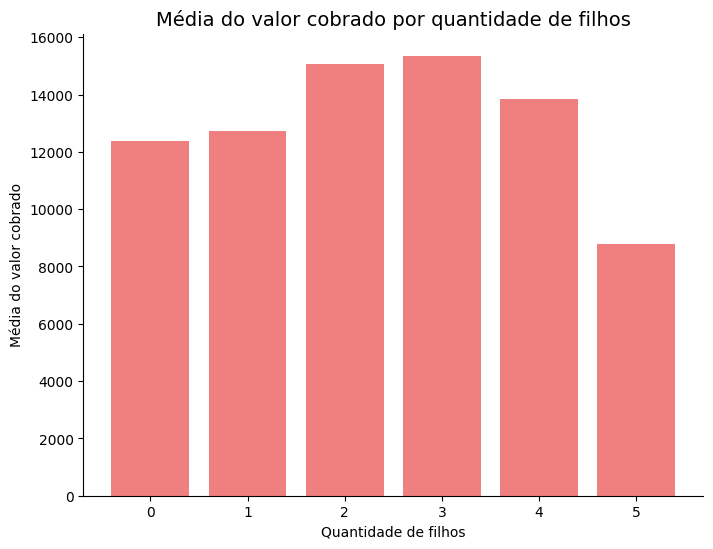

In [27]:
mean_charges = insurance.groupby('children')['charges'].mean().reset_index()

fig, ax = plt.subplots(figsize=(8,6))
ax.bar(mean_charges['children'], mean_charges['charges'], color='lightcoral')

ax.set_xlabel('Quantidade de filhos', fontsize=10)
ax.set_ylabel('Média do valor cobrado', fontsize=10)
ax.set_title('Média do valor cobrado por quantidade de filhos', fontsize=14)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

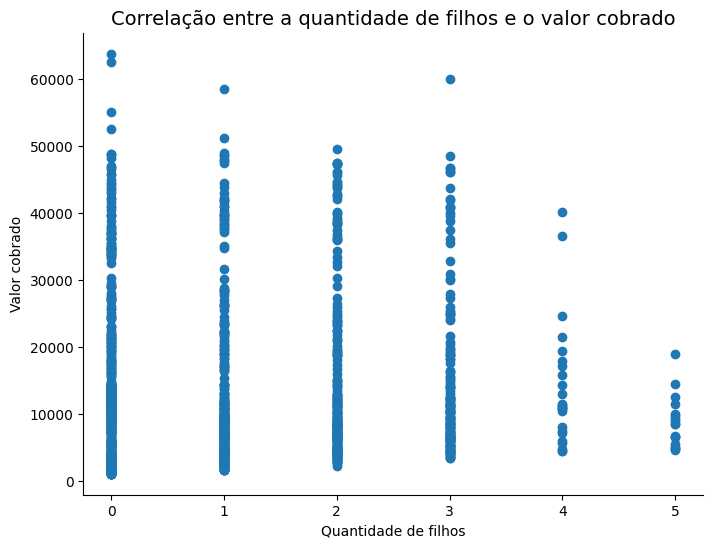

In [28]:
# verificando a correlação entre quantidade de filhos e valores cobrados
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(insurance['children'], insurance['charges'])

ax.set_xlabel('Quantidade de filhos', fontsize = 10)
ax.set_ylabel('Valor cobrado', fontsize = 10)
ax.set_title('Correlação entre a quantidade de filhos e o valor cobrado', fontsize=14)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

Ao plotar um gráfico da correlação entre quantidade de filhos e o valor cobrado, existe a presença de outliers, que influenciam no valor médio. Observa-se, inclusive, que para quem não tem filhos, há outliers com valores de cobrança maiores do que para quem possui filhos.<br>
Logo, a partir do observado, não necessariamente ter mais filhos influencia em cobranças mais altas.

<hr>

### Se uma homem é fumante e ainda tem um BMI acima do considerado normal, é possível que isso seja um indicador negativo para a seguradora. Quantos homens estão nessa situação?

Conforme sugerido no material, foi considerado para o homem, o BMI de 20 a 24,9 como normal. Acima disso, é considerado acima do peso, abaixo é considerado abaixo do peso.

In [29]:
# Criando uma nova coluna, chamada "bmi_male" que recebe o texto "abaixo do normal" para BMI abaixo de 20, "normal" para BMI de 20 a 24,9 e "acima do normal" para BMI acima de 24,9.
def categorize_bmi(row):
    if row['sex'] == 'male':
        bmi = row['bmi']
        if bmi < 20:
            return 'abaixo do normal'
        elif 20 <= bmi <= 24.9:
            return 'normal'
        else:
            return 'acima do normal'
    else:
        return None

insurance['bmi_male'] = insurance.apply(categorize_bmi, axis=1)

insurance.head()

,age,sex,bmi,children,smoker,region,charges,bmi_male
0,19,female,27.900,0,yes,southwest,16884.92400,None
1,18,male,33.770,1,no,southeast,1725.55230,acima do normal
2,28,male,33.000,3,no,southeast,4449.46200,acima do normal
3,33,male,22.705,0,no,northwest,21984.47061,normal
4,32,male,28.880,0,no,northwest,3866.85520,acima do normal


In [30]:
count_smoking_men_above_normal_bmi = insurance.query("sex == 'male' and smoker == 'yes' and bmi_male == 'acima do normal'").shape[0]

print(f'{count_smoking_men_above_normal_bmi} homens presentes no dataset são fumantes e estão acima do peso.')
print('Isso representa {:.2f}% das observações presentes no dataset.'.format((count_smoking_men_above_normal_bmi / insurance.shape[0]) * 100))


136 homens presentes no dataset são fumantes e estão acima do peso.
Isso representa 10.16% das observações presentes no dataset.
